In [21]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [22]:
sms = pd.read_csv('spam.csv',encoding='latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [23]:
sms.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [24]:
sms.rename(columns={'v1':'label','v2':'message'},inplace=True)

In [25]:
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
print(sms.shape)

(5572, 2)


In [27]:
print(sms.label.value_counts())

ham     4825
spam     747
Name: label, dtype: int64


In [28]:
#Ratio
print ('spam ratio = ', round(len(sms[sms['label']=='spam']) / len(sms.label),2)*100,'%')
print ('ham ratio  = ', round(len(sms[sms['label']=='ham']) / len(sms.label),2)*100,'%')

spam ratio =  13.0 %
ham ratio  =  87.0 %


In [29]:
sms['length']=sms.message.str.len()
sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
sms['label'].replace({'ham':0,'spam':1},inplace=True)

In [31]:
# Convert all messages to lower case
sms['message'] = sms['message'].str.lower()

In [32]:
sms.head()

,label,message,length
0,0,"go until jurong point, crazy.. available only ...",111
1,0,ok lar... joking wif u oni...,29
2,1,free entry in 2 a wkly comp to win fa cup fina...,155
3,0,u dun say so early hor... u c already then say...,49
4,0,"nah i don't think he goes to usf, he lives aro...",61


In [33]:
# Replace email addresses with 'email'
sms['message'] = sms['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
sms['message'] = sms['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
sms['message'] = sms['message'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
sms['message'] = sms['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
sms['message'] = sms['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [34]:
# Remove punctuation
sms['message'] = sms['message'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
sms['message'] = sms['message'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
sms['message'] = sms['message'].str.replace(r'^\s+|\s+?$', '')

In [35]:
sms.head()

,label,message,length
0,0,go until jurong point crazy available only in ...,111
1,0,ok lar joking wif u oni,29
2,1,free entry in numbr a wkly comp to win fa cup ...,155
3,0,u dun say so early hor u c already then say,49
4,0,nah i don t think he goes to usf he lives arou...,61


In [36]:
import string
import nltk
from nltk.corpus import stopwords

stop_words=set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

sms['message'] = sms['message'].apply(lambda x:' '.join(term for term in x.split() if term not in stop_words))

In [37]:
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

sms['message'] = sms['message'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [38]:
# New column (clean_length) after puncuations,stopwords removal
sms['clean_length'] = sms.message.str.len()
sms.head()

,label,message,length,clean_length
0,0,go jurong point crazy available bugis n great ...,111,82
1,0,ok lar joking wif oni,29,21
2,1,free entry numbr wkly comp win fa cup final tk...,155,139
3,0,dun say early hor c already say,49,31
4,0,nah think goes usf lives around though,61,38


In [40]:
print('original length:', sms.length.sum())
print('cleaned text length:', sms.clean_length.sum())

original length: 447790
cleaned text length: 300209


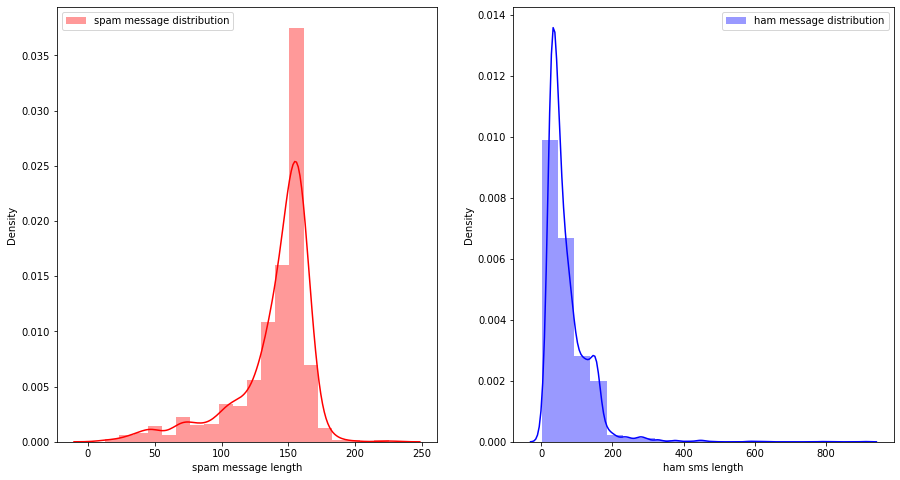

In [43]:
f,ax=plt.subplots(1,2,figsize=(15,8))

sns.distplot(sms[sms['label']==1]['length'],bins=20,ax=ax[0],label='spam message distribution',color='r')
ax[0].set_xlabel('spam message length')
ax[0].legend()

sns.distplot(sms[sms['label']==0]['length'],bins=20,ax=ax[1],label='ham message distribution',color='b')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

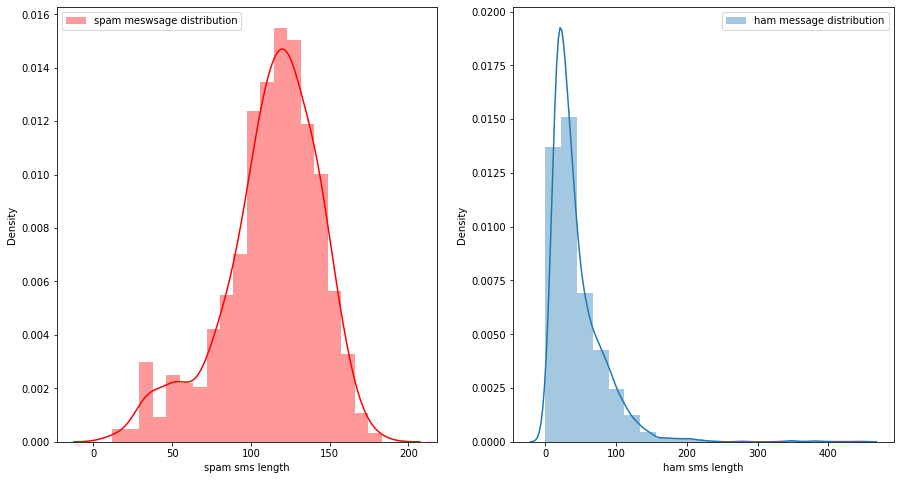

In [44]:
f,ax=plt.subplots(1,2,figsize=(15,8))

sns.distplot(sms[sms['label']==1]['clean_length'],bins=20,ax=ax[0],label='spam meswsage distribution',color='r')

ax[0].set_xlabel('spam sms length')
ax[0].legend()

sns.distplot(sms[sms['label']==0]['clean_length'],bins=20,ax=ax[1],label='ham message distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

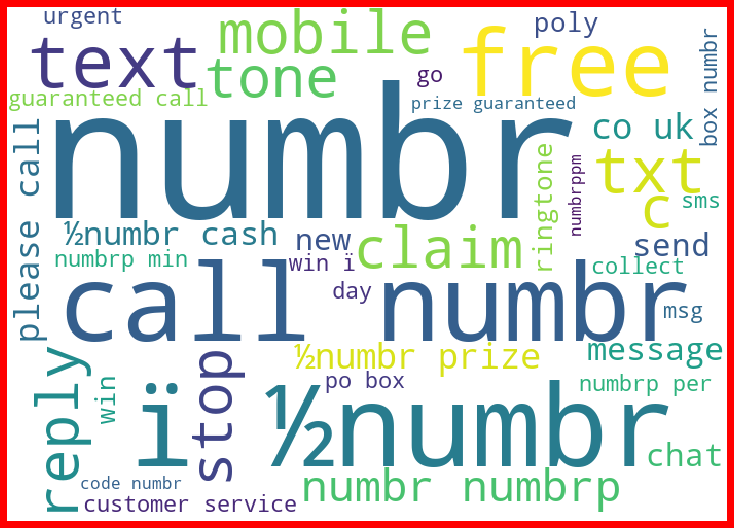

In [55]:
#Getting sense of loud words in spam

from wordcloud import WordCloud

spams=sms['message'][sms['label']==1]

spam_cloud=WordCloud(width=700,height=500,background_color='white',max_words=40).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

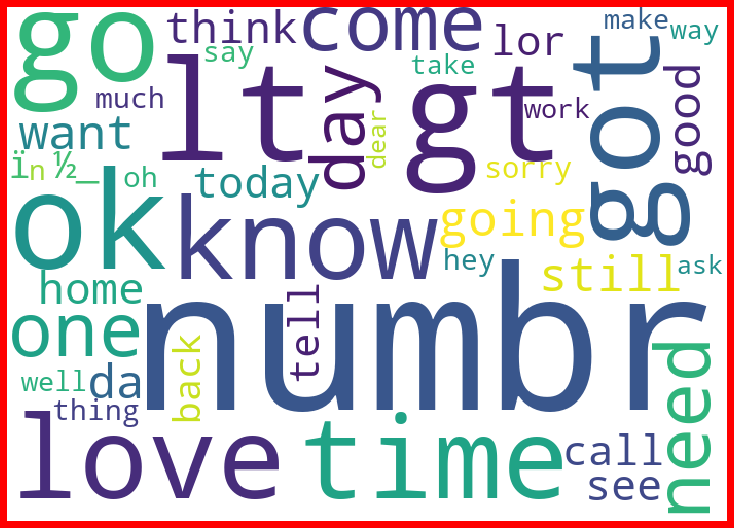

In [56]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


hams = sms['message'][sms['label']==0]

ham_cloud = WordCloud(width=700,height=500,background_color='white',max_words=40).generate(' '.join(hams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(ham_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

tf_vec= TfidfVectorizer()

naive=MultinomialNB()

features=tf_vec.fit_transform(sms['message'])

x=features
y=sms['label']

In [62]:
# Train and predict
X_train,X_test,Y_train,Y_test = train_test_split(x,y,random_state=42)

naive.fit(X_train,Y_train)

y_pred= naive.predict(X_test)

print ('Final score = > ', accuracy_score(Y_test,y_pred))

Final score = >  0.9698492462311558


In [63]:
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [64]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1202
           1       1.00      0.78      0.88       191

    accuracy                           0.97      1393
   macro avg       0.98      0.89      0.93      1393
weighted avg       0.97      0.97      0.97      1393



In [70]:
conf_mat = confusion_matrix(Y_test,y_pred)
print(conf_mat)

[[1202    0]
 [  42  149]]


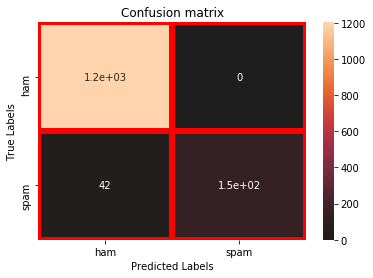

In [69]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(Y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['ham','spam'])
ax.yaxis.set_ticklabels(['ham','spam'])
plt.show()